# Titanic Data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
titanic = pd.read_csv("../train.csv")

In [18]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
#number of passsengers travelling in titanic
titanic.shape

(891, 12)

# Analysing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

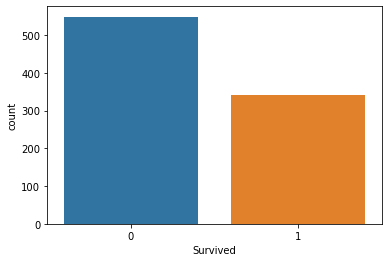

In [20]:
sns.countplot(x = "Survived", data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

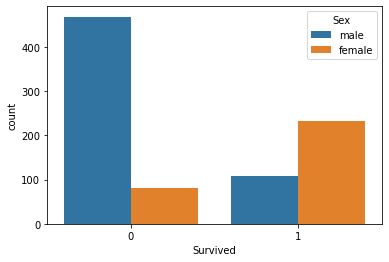

In [21]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic)

# finding 1 = sex  is a big factor for surviving

<AxesSubplot:xlabel='Survived', ylabel='count'>

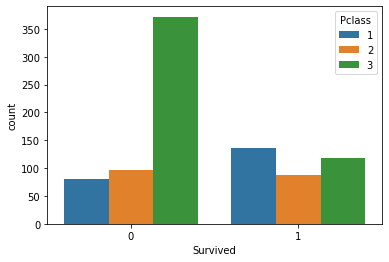

In [22]:
sns.countplot(x = "Survived",hue = "Pclass", data = titanic)

# finding 2 = Pclass also matters for survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

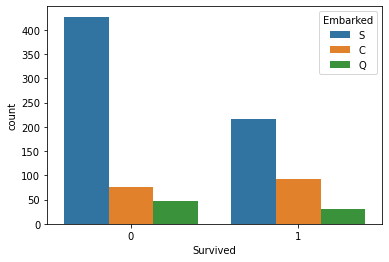

In [23]:
sns.countplot(x = "Survived", hue = "Embarked", data = titanic)

<AxesSubplot:xlabel='Age', ylabel='Count'>

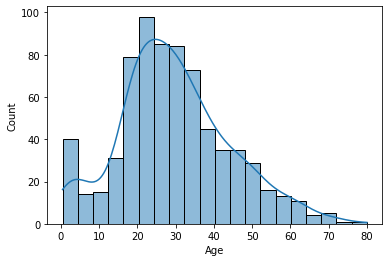

In [24]:
sns.histplot(x = "Age", data = titanic, kde = True)

# Data wrangiling

<AxesSubplot:>

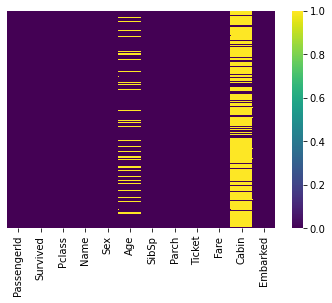

In [25]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = "viridis")

In [26]:
titanic.drop("Cabin", axis = 1, inplace = True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

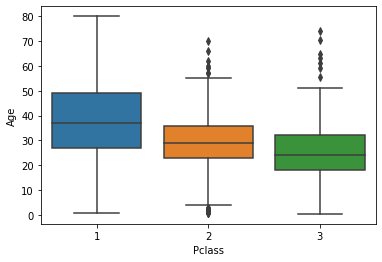

In [28]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic)

In [29]:
titanic.dropna(inplace = True)

<AxesSubplot:>

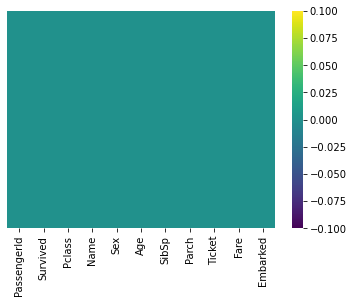

In [30]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = "viridis")
# our data is clean now

# Adding catogerical data to dataset and converting the string objects

In [31]:
sex = pd.get_dummies(titanic.Sex, drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
plc = pd.get_dummies(titanic.Pclass, drop_first = True)
plc.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [33]:
embrk = pd.get_dummies(titanic.Embarked, drop_first = True)
embrk.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
titanic = pd.concat([titanic,sex,plc,embrk], axis = 1)

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [36]:
#more cleaning
titanic.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"], axis = 1, inplace = True)

In [37]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Traing and Test

In [38]:
X = titanic.drop("Survived", axis = 1)
y = titanic.Survived

In [39]:
titanic.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
2             uint8
3             uint8
Q             uint8
S             uint8
dtype: object

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 1)

In [42]:
X_train.shape

(498, 9)

In [43]:
X_test.shape

(214, 9)

# Logistic Regression and classification report

In [44]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = "liblinear")


In [45]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [46]:
prediction = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
 classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

# Confusion matrix and accuracy score

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,prediction)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,prediction)

0.7850467289719626

# Logistic Regression Notes for data transformation

In [53]:
# we want all our data (target) to be normally distributed if its not normally distributed i.e rightly of left skweed we use sqrt() or log() transformation on target data.

# How to Give threshhold value

In [54]:
#data.loc[np.square(data['price']) < 20000, 'price'] = 0
#data.loc[np.square(data['price']) >= 20000, 'price'] = 1

In [55]:
slope = np.array(logmodel.coef_[0])
print(slope)

[-0.03192343 -0.31495823 -0.08617771  0.0073788  -2.31215158 -0.3783971
 -1.46198344 -0.41166772 -0.05298896]


In [60]:
intercept = logmodel.intercept_
print(intercept)

[2.76355665]


In [66]:
#model score
logmodel.score(X,y)

0.800561797752809

# Model testting

In [58]:
my_prediction = logmodel.predict([[22.0,1,0,7.2500,1,0,1,0,1]])

In [59]:
my_prediction

array([0], dtype=int64)